In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
sns.set_style('darkgrid')
sns.set_palette('RdBu_r')

<Figure size 1800x1200 with 0 Axes>

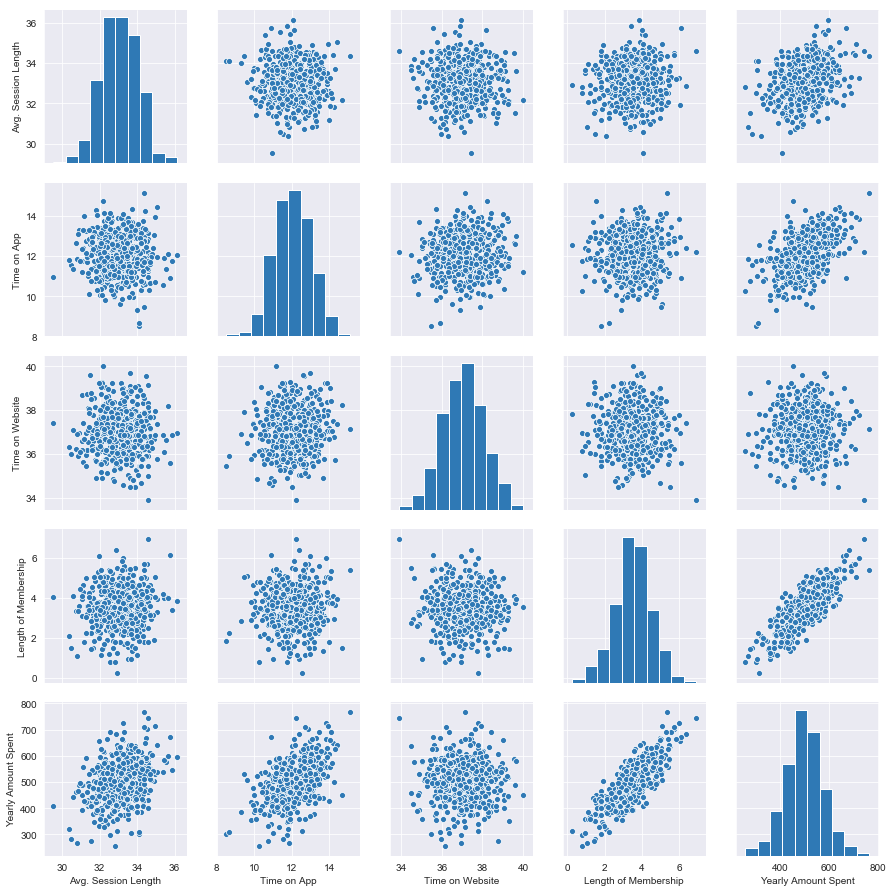

In [7]:
fig=plt.figure(dpi=300)
sns.pairplot(customers)

# Based on the pairplot the correlated fearue to teh Yearly 
# Amount Spend is Length od Membership

In [8]:
from scipy import stats


In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    customers['Length of Membership'],
    customers['Yearly Amount Spent'])


C:\Users\babak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 3600x2400 with 0 Axes>

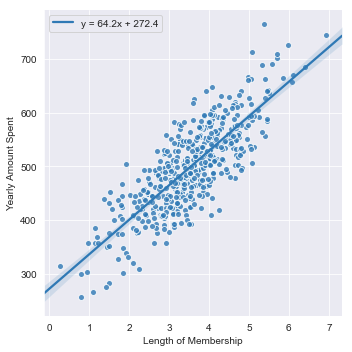

In [10]:
# create a linear model with Seaborn for most correlated feature
fig= plt.figure(dpi=600)
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',
           data=customers, scatter_kws={'edgecolor':'white'},
           line_kws={'label':"y = {0:.1f}x + {1:.1f}".format(slope,intercept)})
plt.legend()

plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
customers.keys()

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [19]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
dd = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
dd

,Coeff
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [26]:
prediction = lm.predict(X_test)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 <a list of 7 Text yticklabel objects>)

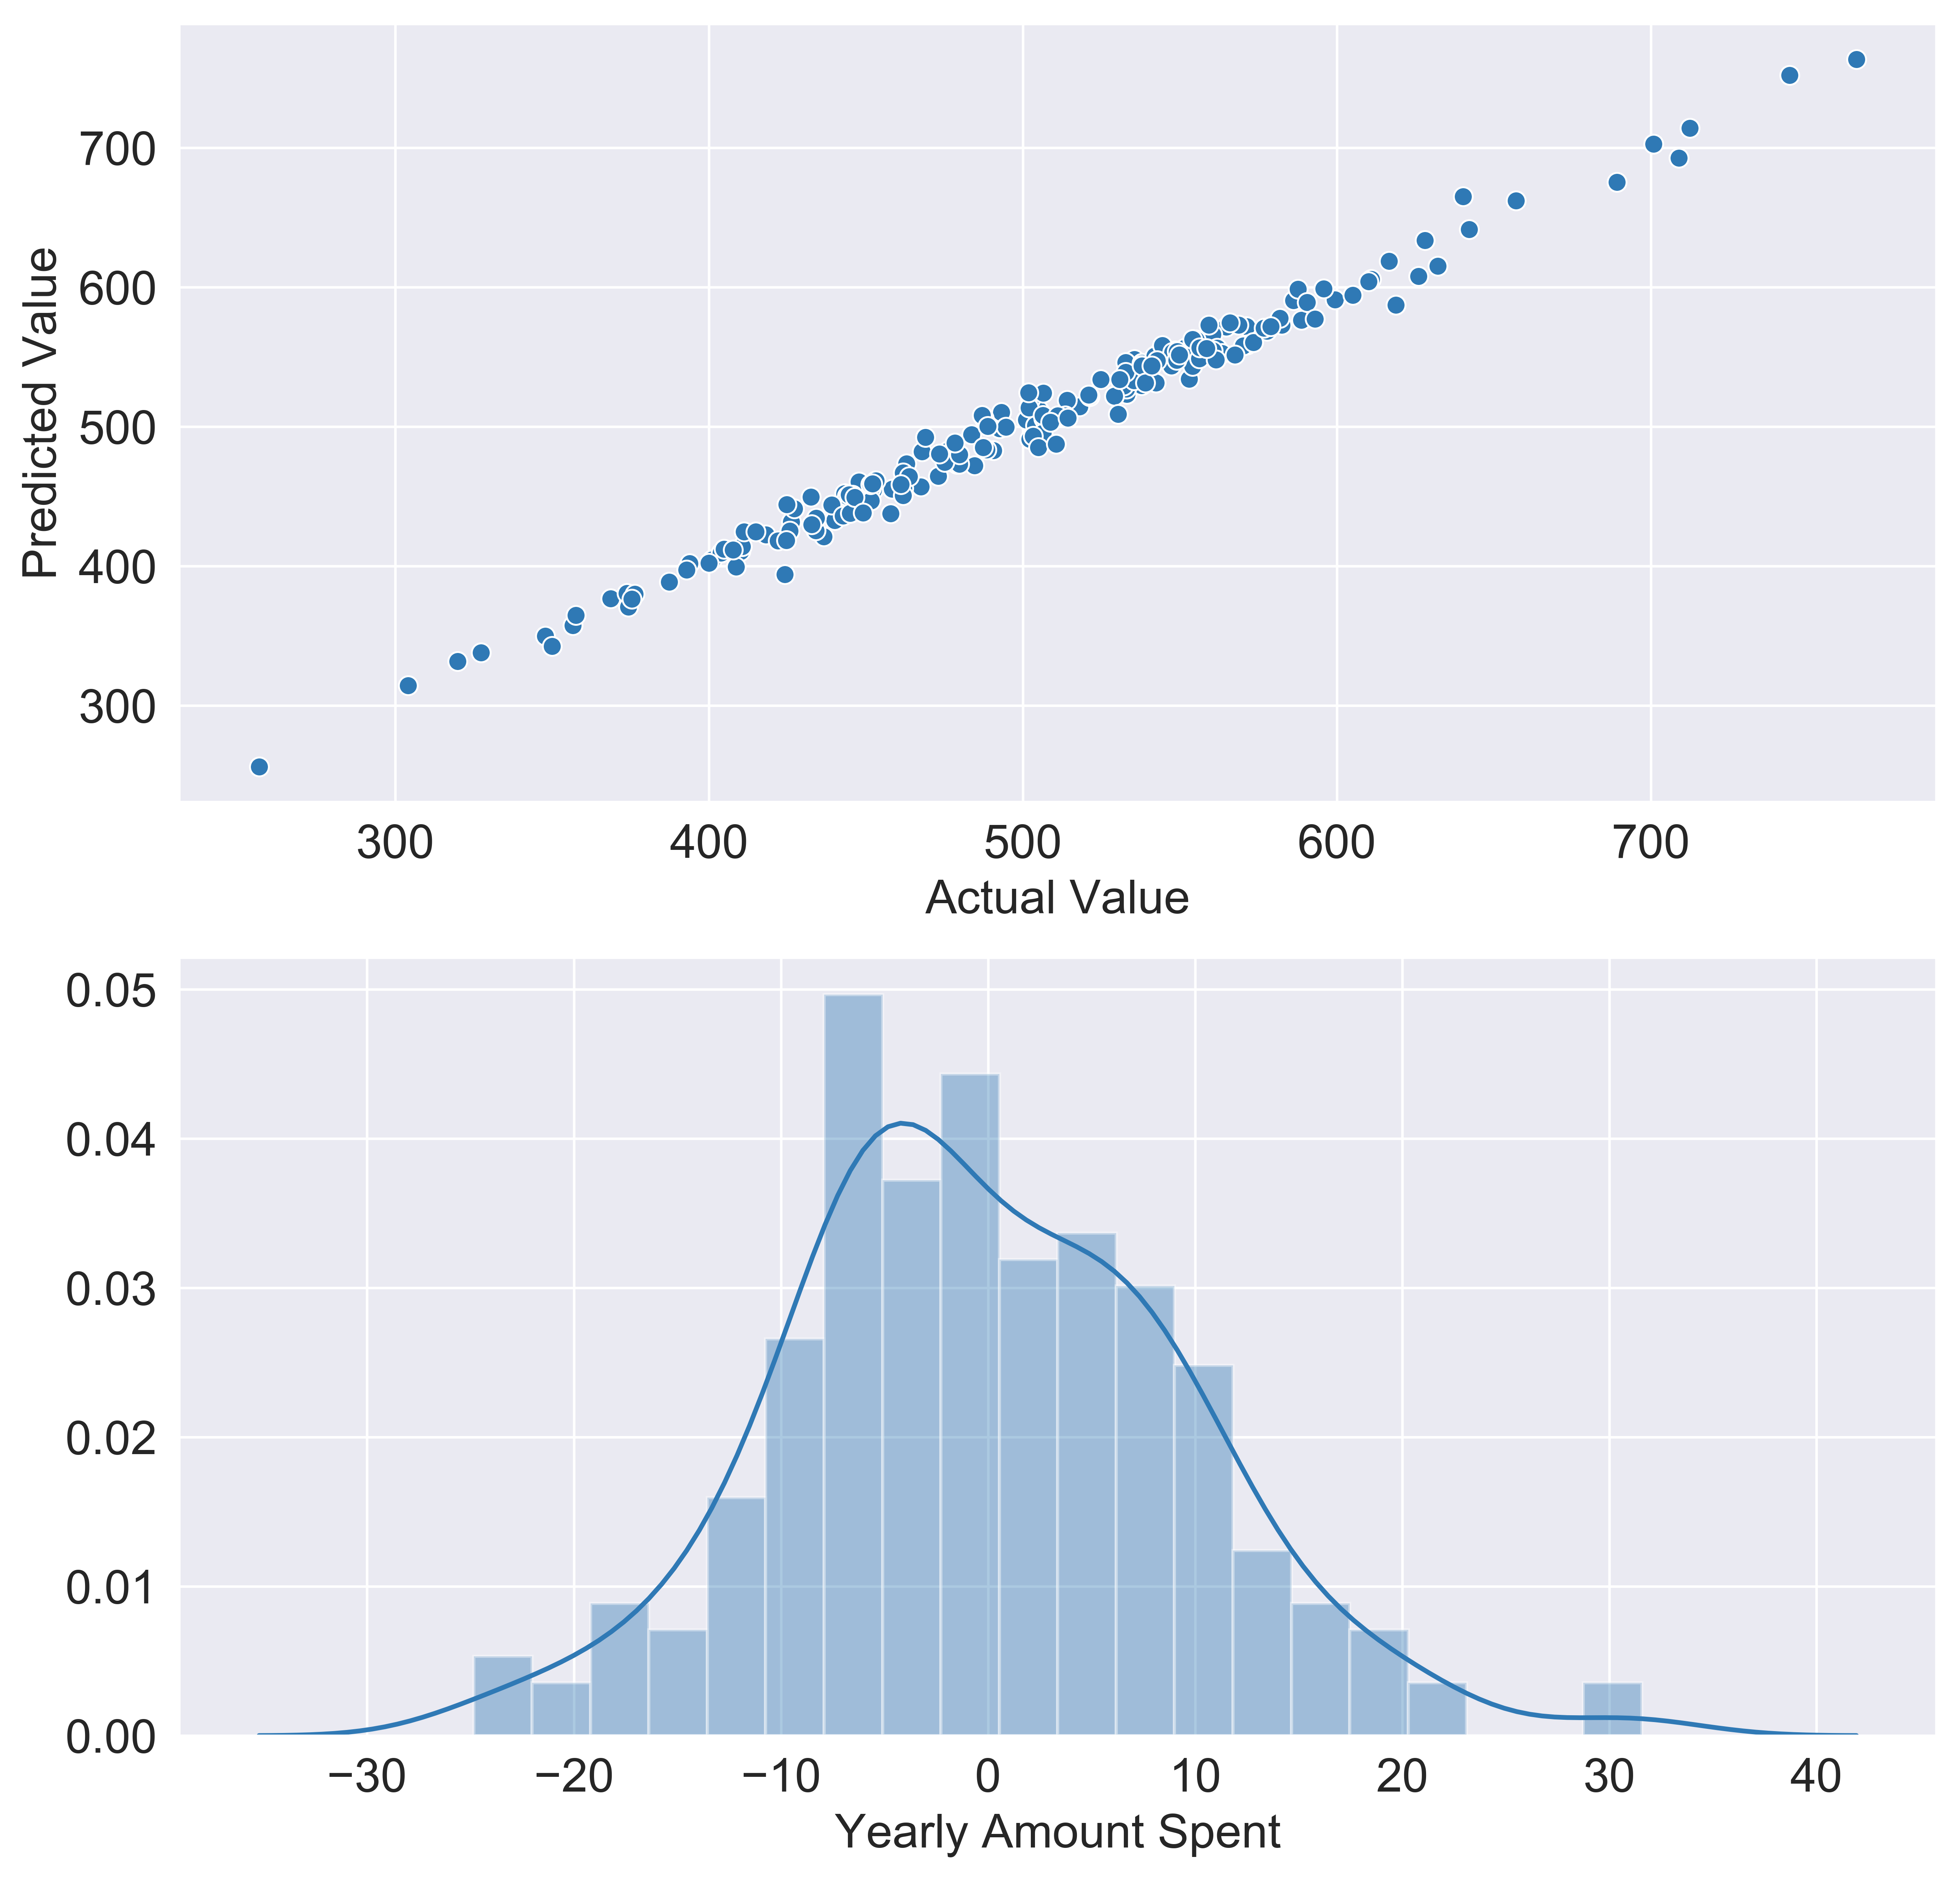

In [37]:
# Test the residual and real test valu vs predicted values

fig = plt.figure(figsize=(10,10), dpi=600)
plt.subplot(2,1,1)
plt.scatter(y_test,prediction,edgecolors='white', linewidths=0.6)
plt.xlabel('Actual Value', fontsize=15)
plt.ylabel('Predicted Value', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,1,2)
sns.distplot((y_test-prediction),bins=20)
plt.xlabel('Yearly Amount Spent', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [39]:
from sklearn import metrics

print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MAE: ',metrics.mean_squared_error(y_test,prediction))
print('MAE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  7.7426712858387505
MAE:  93.83297800820091
MAE:  9.686742383701597
